In [2]:

import numpy as np 
import matplotlib.pyplot as plt 
import requests
import pandas as pd
import seaborn as sns
from scipy import stats



In [3]:



wine_cols = ["ID","Winery","Name", "Vintage","Country","Region",
             "Wine_Style", "Wine_Type", "Wine_Type_ID", 
             "Grape Type","Grape_ID",  
             'Rating', 'Review_Count','Price', 
             'Acidity', "Fizziness", "Intensity", "Sweetness", "Tannin"]

wine_df = pd.DataFrame(columns=wine_cols)
temp_df = pd.DataFrame(columns=wine_cols)

for y in range(2):       # y range is the number of grape types (up to 200)
    for x in range(2):  # x range is the number of pages (up to ?? - depends on grape)
        for z in range(1,5): # z range is the wine type (1: red, 2: white, 3: sparkling, 4: rosé)   
            r = requests.get(
            "https://www.vivino.com/api/explore/explore",
            params = {
                #"country_code": "en",
                'grape_ids[]':y+1,
                #"country_codes[]":["pt", "es", "fr", "de"],
                "currency_code":"EUR",
                #"grape_filter":"varietal",
                "min_rating":"1",
                #"order_by":"price", #  "ratings_average"
                #"order":"asc",
                "page": x+1,
                "price_range_max":"1500",
                "price_range_min":"0",
                "wine_type_ids[]":z, # red: 1;  white: 2; sparkling: 3; rosé: 4;
                "language":"en",
                "per_page":50
            },
                headers= {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",  
                'Accept': 'application/json',
                'Accept-Language': 'en-US,en;q=0.5',
            }

            )
            try:
                    
                results = [
                    (
                    f'{t["vintage"]["wine"]["name"]} {t["vintage"]["year"]}',#ID
                    t["vintage"]["wine"]["winery"]["name"], #winery
                    t["vintage"]["wine"]["name"], #Name
                    t["vintage"]["year"], #Vintage
                    t["vintage"]["wine"]["region"]["country"]["name"], #Country
                    t["vintage"]["wine"]["region"]["name"], #region
                    t["vintage"]["wine"]["style"]["seo_name"], # wine style
                    t["vintage"]["wine"]["style"]["varietal_name"], # wine type
                    t["vintage"]["wine"]["type_id"], #wine type by id
                    r.json()["selected_filters"][0]["items"][0]["name"], # grape type
                    r.json()["selected_filters"][0]["items"][0]["id"], # grape id
                    t["vintage"]["statistics"]["ratings_average"], #rating
                    t["vintage"]["statistics"]["ratings_count"],# number of ratings
                    t["price"]["amount"],#price
                    t["vintage"]["wine"]["taste"]["structure"]["acidity"], # wine dimensions 1
                    t["vintage"]["wine"]["taste"]["structure"]["fizziness"],# wine dimensions 2
                    t["vintage"]["wine"]["taste"]["structure"]["intensity"], # wine dimensions 3
                    t["vintage"]["wine"]["taste"]["structure"]["sweetness"],# wine dimensions 4
                    t["vintage"]["wine"]["taste"]["structure"]["tannin"]    # wine dimensions 5

                    )
                    for t in r.json()["explore_vintage"]["matches"]
                    ]
                temp_df = pd.DataFrame(results,columns=wine_cols)
                wine_df = pd.concat([wine_df, temp_df], ignore_index=True)
            except:
                    pass

/tmp/ipykernel_79164/2200351032.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  wine_df = pd.concat([wine_df, temp_df], ignore_index=True)
/tmp/ipykernel_79164/2200351032.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  wine_df = pd.concat([wine_df, temp_df], ignore_index=True)
/tmp/ipykernel_79164/2200351032.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns w

Country             
Australia      Price    0.551265
Chile          Price         NaN
France         Price    0.288916
Italy          Price    0.364582
Spain          Price   -1.000000
United States  Price    0.331896
Name: Rating, dtype: float64
Correlation between Price and Rating for Australia: 0.3316381868826661
Correlation between Price and Rating for United States: 0.29432661155622686
Correlation between Price and Rating for France: 0.4976052711911635
Correlation between Price and Rating for Italy: 0.6702540795815869
Correlation between Price and Rating for Spain: nan
Correlation between Price and Rating for Chile: nan


/home/marci/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/marci/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/marci/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


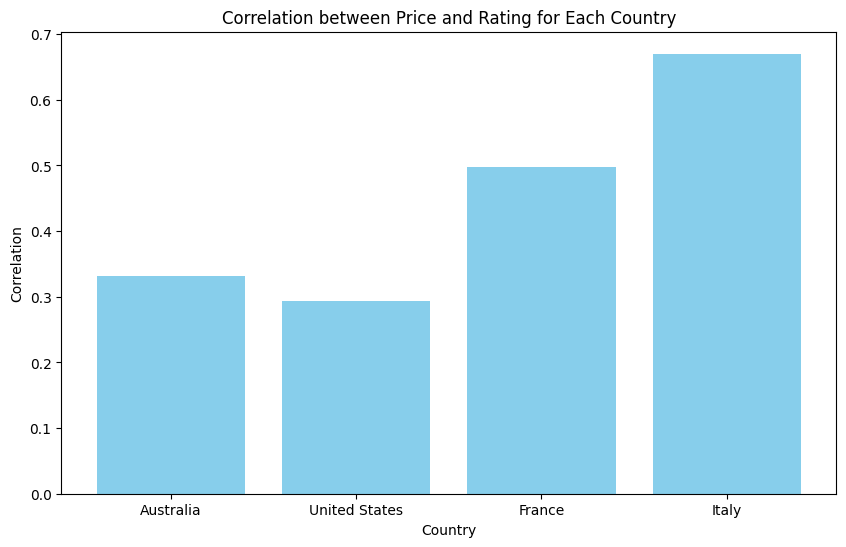

In [4]:
#Solution with '0' reviews included
correlations_by_country = wine_df.groupby('Country')[['Price', 'Rating']].corr().iloc[0::2, -1]
print(correlations_by_country)

#Solution without '0' reviews
# Create a dictionary to store correlation values for each country
correlation_dict = {}
distinct_countries = wine_df['Country'].unique()
# Calculate for each distinct country
for country in distinct_countries:
    # Select a specific country (e.g., 'France')
    selected_country = country
    country_data = wine_df[wine_df['Country'] == selected_country]
    
    asd=country_data.replace(0,np.NaN)
    

    # Check the correlation between 'Price' and 'Rating' for the selected country
    correlation = asd['Price'].corr(asd['Rating'])
    correlation_dict[country] = correlation

    # Display the correlation for the selected country
    print(f"Correlation between Price and Rating for {selected_country}: {correlation}")
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Country', 'Correlation'])
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(correlation_df['Country'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.title('Correlation between Price and Rating for Each Country')
plt.show()


              Price   Acidity  Intensity  Sweetness
Price      1.000000  0.043957   0.470937   0.311701
Acidity    0.043957  1.000000  -0.183907  -0.384756
Intensity  0.470937 -0.183907   1.000000   0.564762
Sweetness  0.311701 -0.384756   0.564762   1.000000


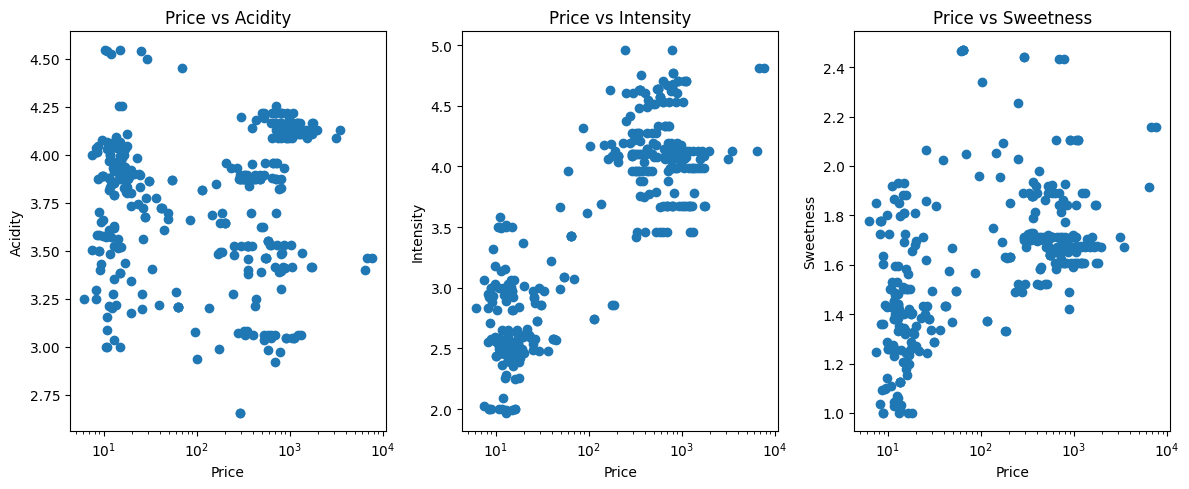

In [5]:

correlation_matrix = wine_df[['Price', 'Acidity', 'Intensity', 'Sweetness']].corr()
print(correlation_matrix)


# Selecting columns for the scatter plot matrix
selected_attributes = ['Acidity', 'Intensity', 'Sweetness']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, len(selected_attributes), figsize=(12, 5))

# Plotting scatter plots for each selected attribute against 'Price'
for i, attribute in enumerate(selected_attributes):
    axes[i].scatter(wine_df['Price'], wine_df[attribute], marker='o')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel(attribute)
    axes[i].set_xscale('log')
    axes[i].set_title(f'Price vs {attribute}')




# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
df_bigwine=pd.read_csv("../ressources/df_out.csv")

df_bigwine['Rating'] = df_bigwine['Rating'].replace(0, np.nan)




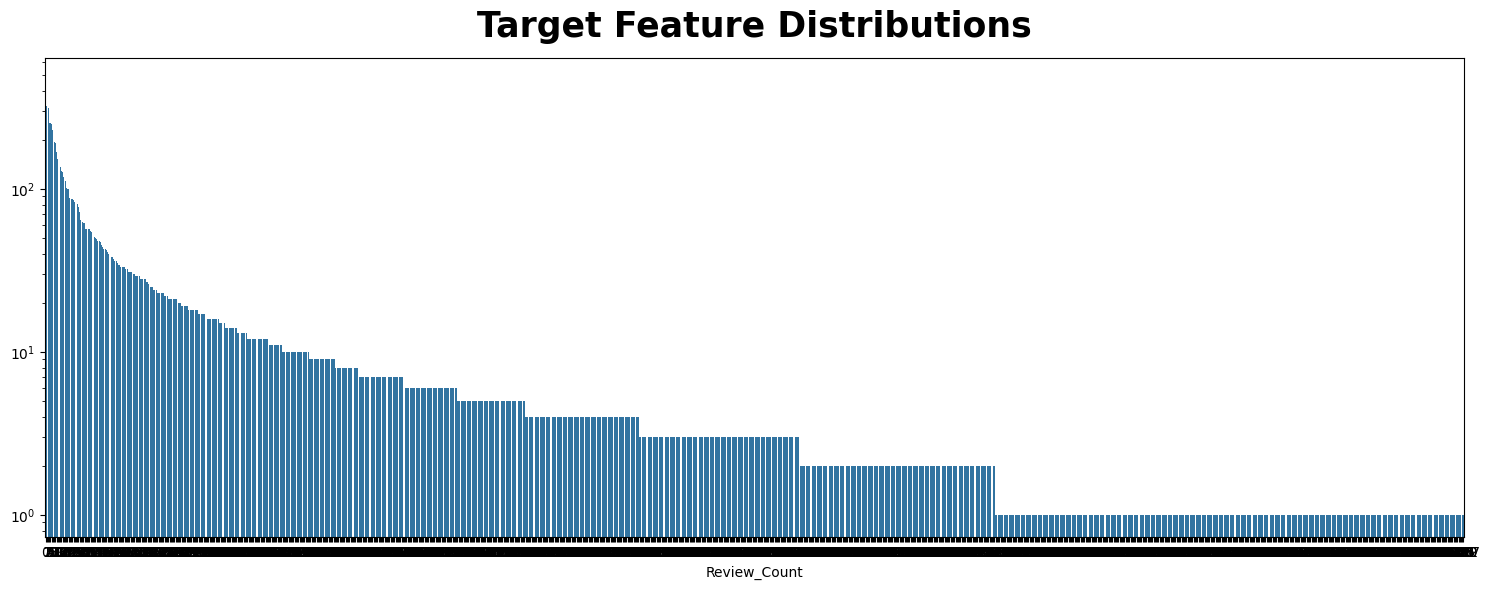

In [7]:
#Target feature distribution, in this case its review count
z = df_bigwine["Review_Count"].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=z.index, y=z.values, order=z.index)
plt.title("Target Feature Distributions",fontweight="black",size=25,pad=15)
plt.yscale('log')
plt.xticks()
plt.tight_layout()
plt.show()

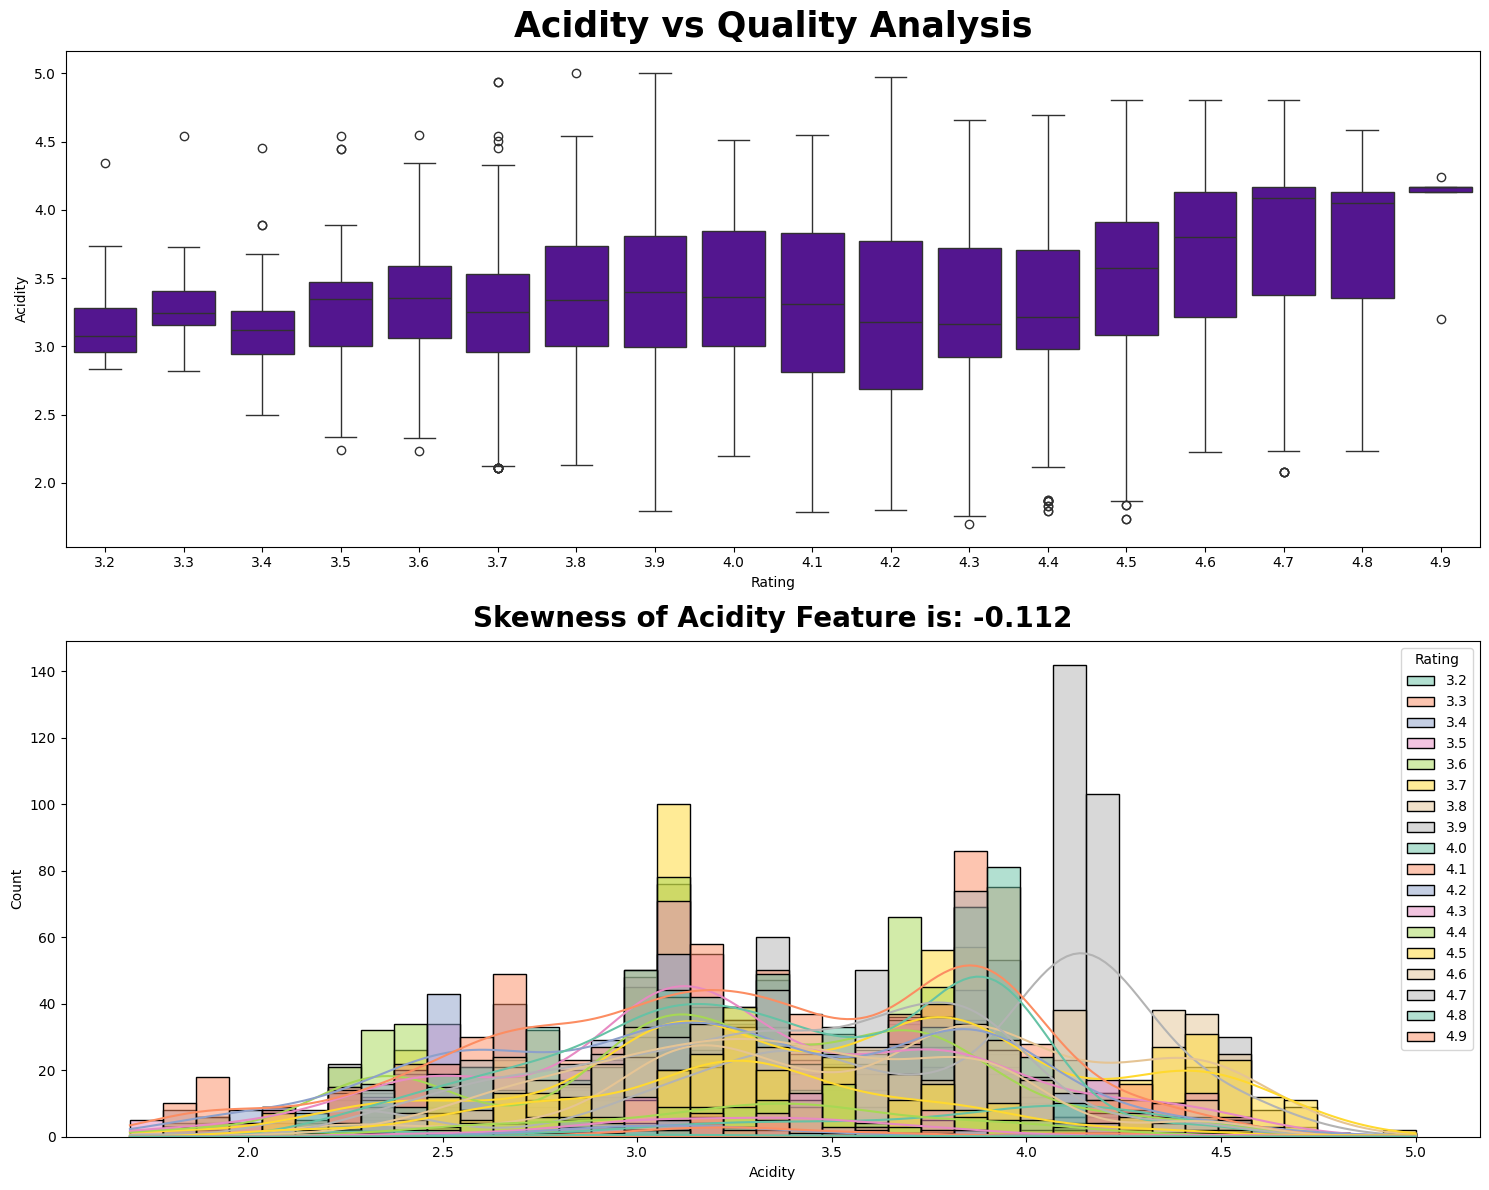

In [8]:
# Set the color palette to "plasma"
sns.set_palette("plasma")

#Name of the column to check against Rating
column="Acidity"

plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.boxplot(x="Rating",y=column, data=df_bigwine)
plt.title(f"{column.title()} vs Quality Analysis",fontweight="black",size=25,pad=10,)
plt.savefig(f"../ressources/{column}_vs_rating.pdf")

plt.subplot(2,1,2)
sns.histplot(x=column,kde=True,hue="Rating",data=df_bigwine, palette="Set2")
skew = df_bigwine[column].skew()
plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

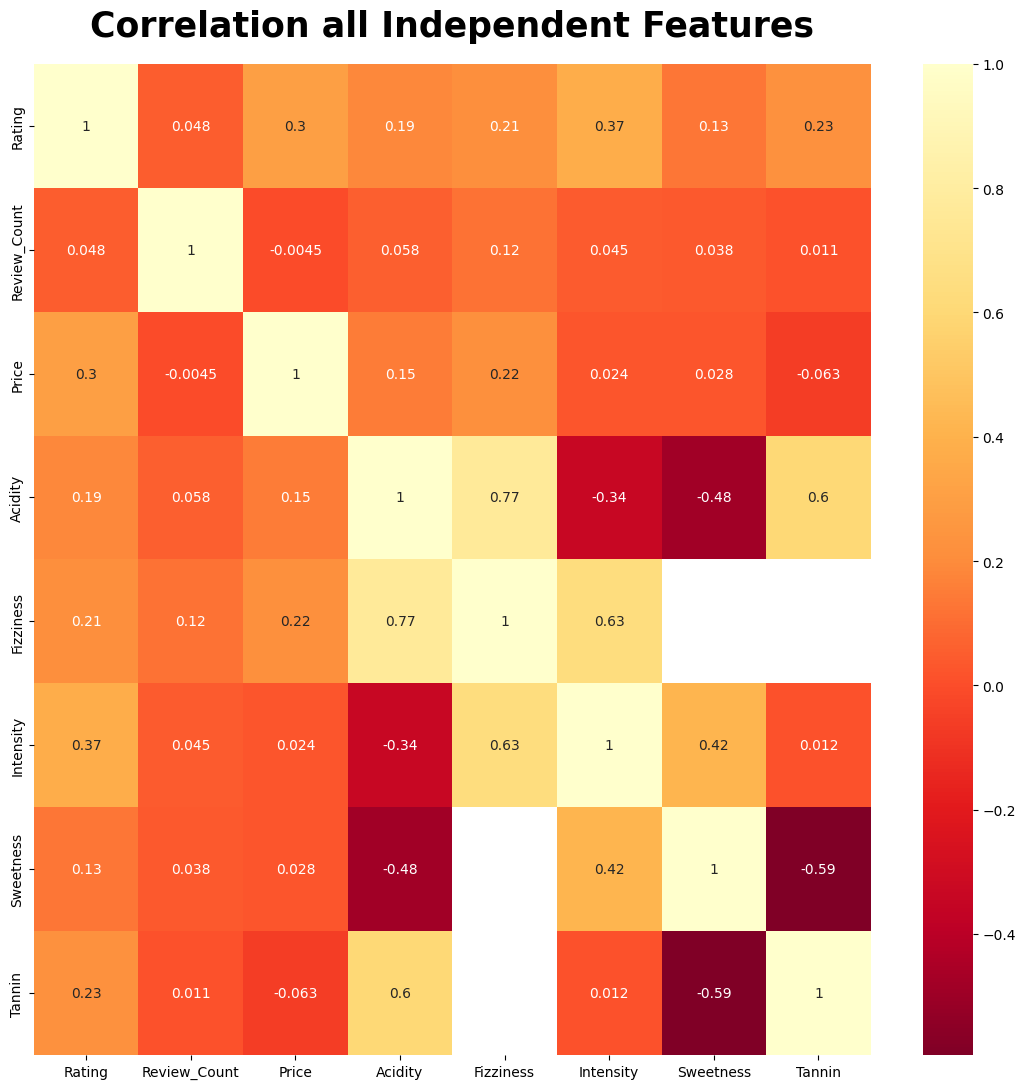

In [9]:
columns=["Rating","Review_Count","Price","Acidity","Fizziness","Intensity","Sweetness","Tannin"]

corr = df_bigwine[columns].corr()

plt.figure(figsize=(11,11))

sns.heatmap(corr,fmt=".2g",annot=True ,cmap='YlOrRd_r')
plt.title("Correlation all Independent Features",fontweight="black",size=25,pad=20)
plt.tight_layout()
plt.savefig("../ressources/heatmap.pdf")
plt.show()


0 4281
0 0
205.85796458917878 1.9404819457815036e-46
0 4281
0 0
303.74952339306134 1.7127630888728227e-67
0 4281
0 0
12209.588273567064 0.0
10149 4281
0 0
2581.3388617119936 0.0
0 4281
0 0
6597.290129942562 0.0
1354 4281
0 0
133587.33729055454 0.0
5991 4281
0 0
18764.58998359908 0.0


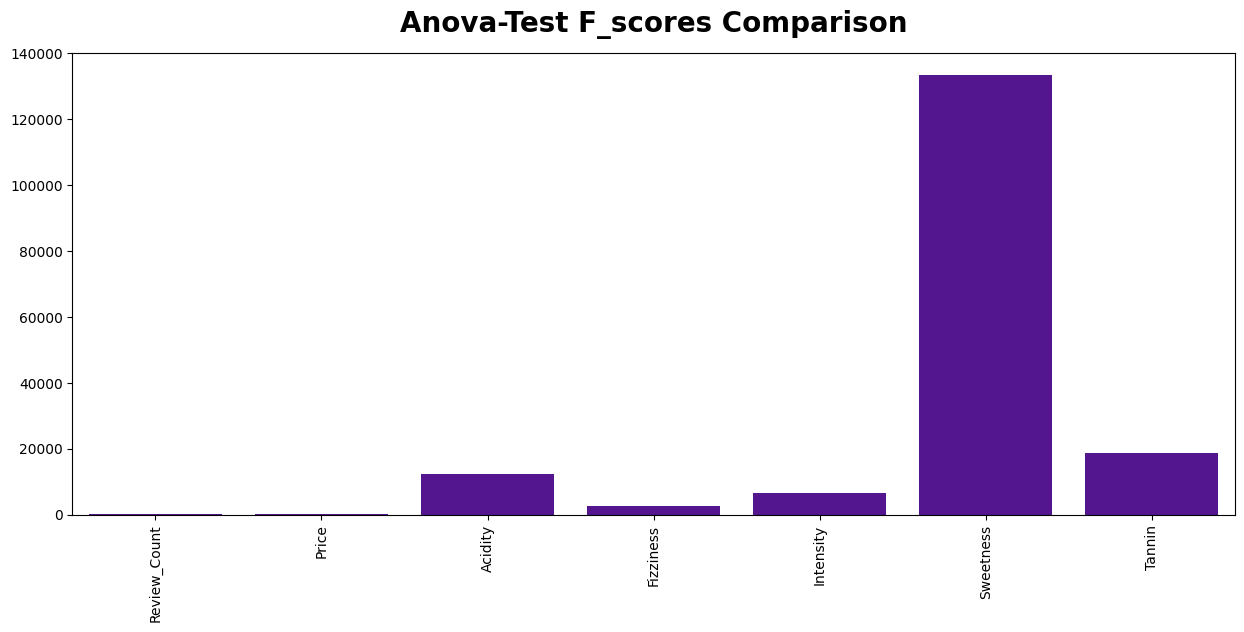

In [17]:
f_scores = {}
p_values = {}
#removed "rating from list since that is what we are comparing against??"
columns=["Review_Count","Price","Acidity","Fizziness","Intensity","Sweetness","Tannin"]

for column in columns:
    print(df_bigwine[column].isnull().sum(),df_bigwine["Rating"].isnull().sum())
    df1=df_bigwine[column].dropna()
    df2=df_bigwine["Rating"].dropna()
    print(df1.isnull().sum(),df2.isnull().sum())
    f_score, p_value = stats.f_oneway(df1,df2)
    print(f_score,p_value)
    f_scores[column] = f_score
    p_values[column] = p_value

plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)
plt.savefig(f"../ressources/anova_vs_rating.pdf")

# for index,value in enumerate(values):
#     plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)

plt.show()

/tmp/ipykernel_1087/1769457293.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
/tmp/ipykernel_1087/1769457293.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))
/tmp/ipykernel_1087/1769457293.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_xticklabels(graph1.get_xticklabels())
/tmp/ipykernel_1087/1769457293.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))


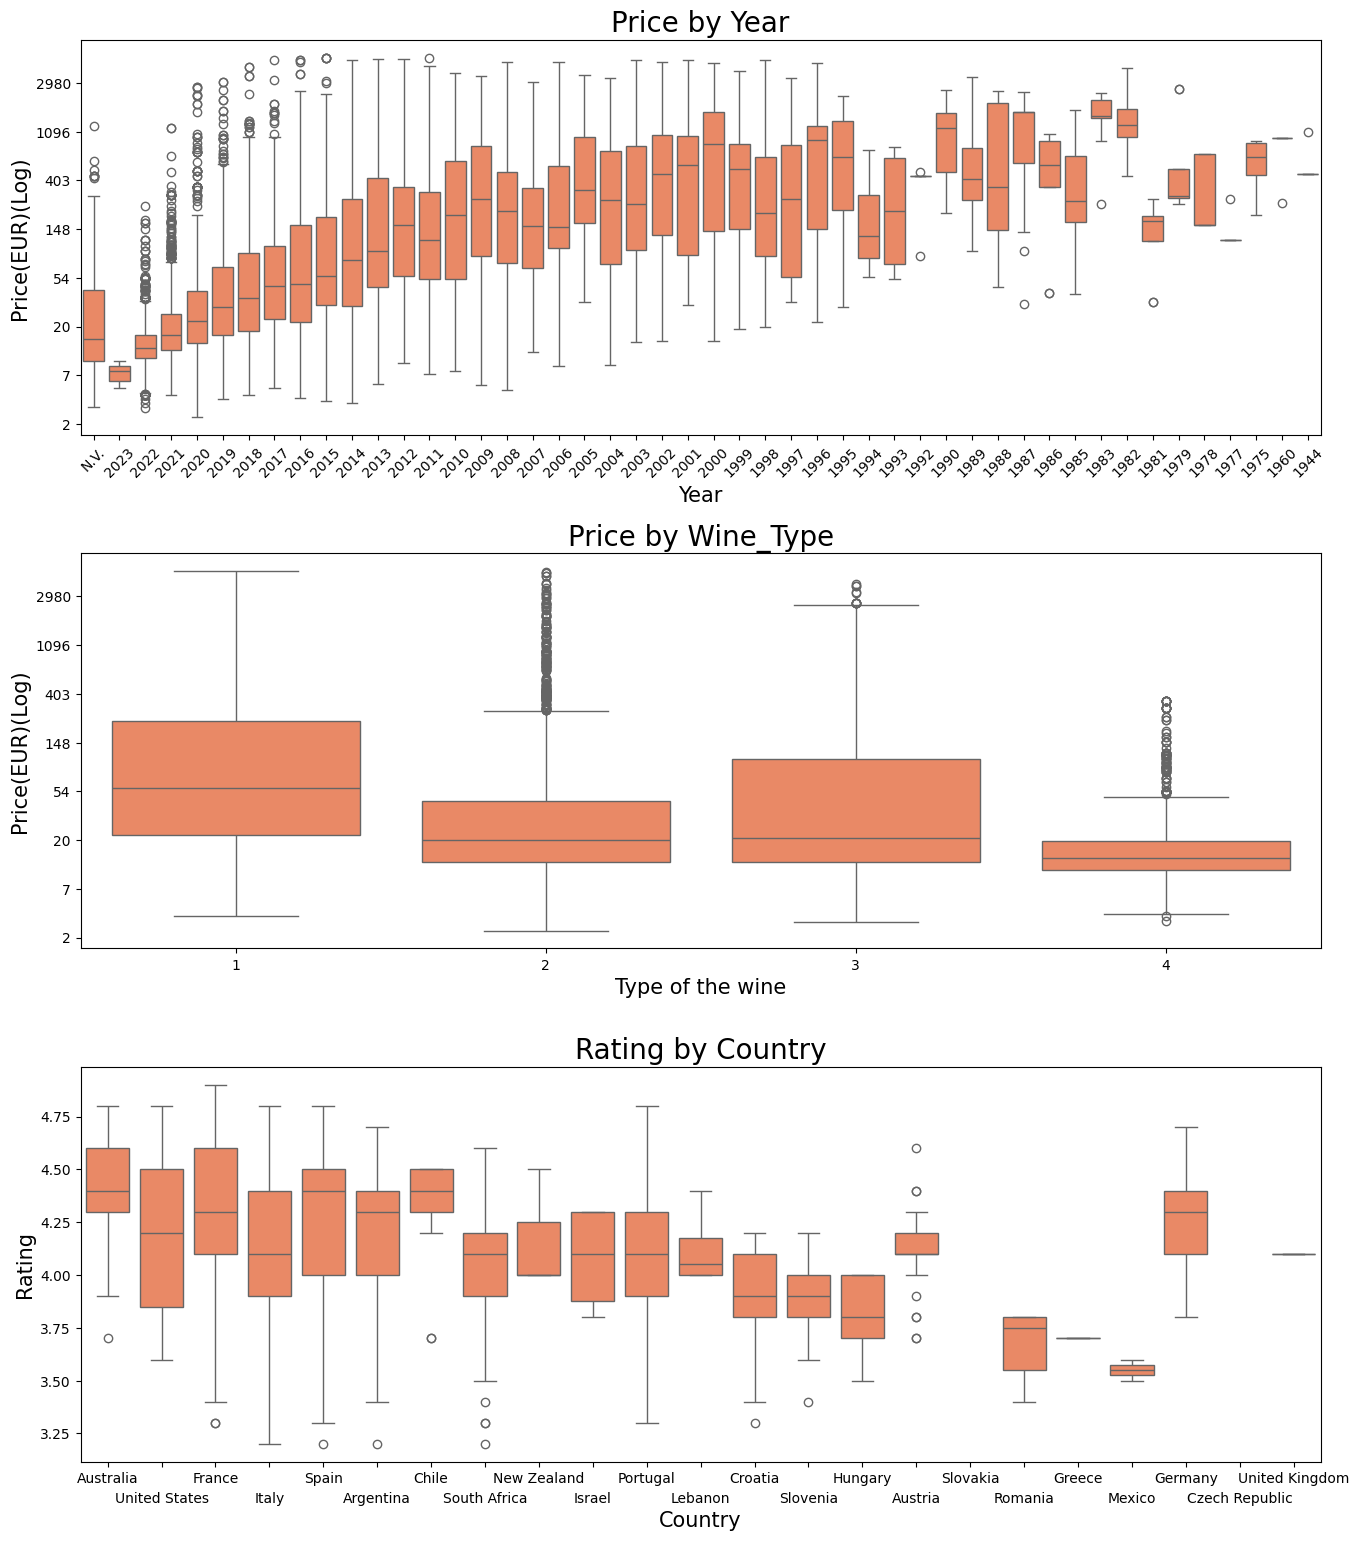

In [ ]:
plt.figure(figsize=(16,18))

# Step 1: Count occurrences for each year
year_counts = df_bigwine['Vintage'].value_counts()

# Step 2: Filter out years with less than 5 entries
valid_years = year_counts[year_counts >= 5].index

# Step 3: Sort the remaining years in descending order
sorted_years = sorted(valid_years, reverse=True)

# Determine the 99th percentile of Price  THIS CAN PROBABLY BE MODIFIED WITHIN THE BOXPLOT SETTINGS AS WELL
cutoff_threshold = df_bigwine['Price'].quantile(0.99)

# Filter the DataFrame to exclude top 1% outliers
df_filtered = df_bigwine[df_bigwine['Price'] <= cutoff_threshold]

plt.subplot(3,1,1)
graph = sns.boxplot(x='Vintage', y=np.log(df_filtered['Price']),
                    data=df_filtered,
                    color='coral',
                    order=sorted_years)
graph.set_title("Price by Year", fontsize=20)
graph.set_xlabel("Year", fontsize=15)
graph.set_ylabel("Price(EUR)(Log)", fontsize=15)
#graph.set_yscale('log')
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))


plt.subplot(3,1,2)
graph1 = sns.boxplot(x='Wine_Type_ID', y=np.log(df_filtered['Price']),
                 data=df_filtered,
                 color='coral')
graph1.set_title("Price by Wine_Type", fontsize=20)
graph1.set_xlabel("Type of the wine", fontsize=15)
graph1.set_ylabel("Price(EUR)(Log)", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels())
graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))

plt.subplot(3,1,3)
graph2 = sns.boxplot(x='Country', y=df_filtered['Rating'],
                 data=df_filtered,
                 color='coral')
graph2.set_title("Rating by Country", fontsize=20)
graph2.set_xlabel("Country", fontsize=15)
graph2.set_ylabel("Rating", fontsize=15)
#graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))
# Offset every second x-axis tick label
for i, label in enumerate(graph2.get_xticklabels()):
    if i % 2 != 0:  # Offset every second label
        label.set_y(label.get_position()[1] - 0.05)  # Adjust the offset value as needed

plt.subplots_adjust(hspace = 0.3, top = 0.9)

<Axes: xlabel='Rating', ylabel='Price'>

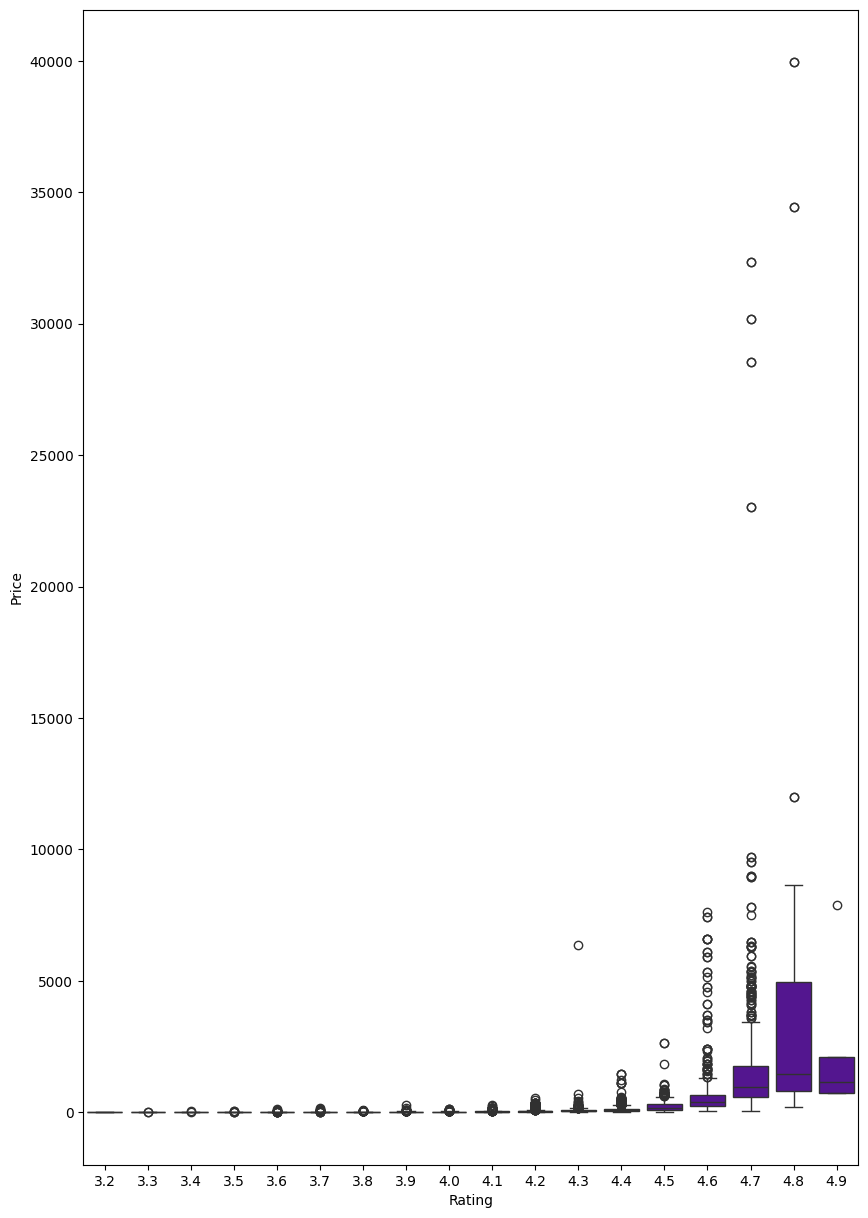

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df_bigwine, y='Price', x='Rating', orient='v')